## Introduction

In this example, we will show how to explore the cell-cycle dataset of CCTD-U using AggMap.

The **CCTD-U[1]** dataset is a cell-cycle transcriptome data of U2OS cells, consisting of the expression levels of 5162 genes at 5 different cell cycle stages (G1, G1 / S, S, G2, M). This dataset was transformed using z-score standard scaling. 

By fitting on the CCTD-U dataset, AggMap can transform it into feature maps (Fmaps). Visualization of AggMap multi-channel Fmaps of the cell-cycle **CCTD-U** dataset at different cell replication phases indicated that multi-channel Fmaps can easily select stage-specific genes. The stage -specific genes in the five cell-cycle phases can be easily aggregated into hot-zones in the single-channel Fmaps based on their correlations, while the multi-channel Fmaps further separate the phase-specific genes into different channels. Therefore, the multi-channel Fmaps facilitate group-specific feature learning or feature selective learning by AggMapNet. 

By the hierarchical clustering-guided channel splits, each cluster (group) of feature points may be separately embedded into a different Fmap channel. More clusters enable more fine-grained separations of feature points into groups. 


* [1]. Hao, Q., Zong, X., Sun, Q., Lin, Y.-C., Song, Y.J., Hashemikhabir, S., Hsu, R.Y., Kamran, M., Chaudhary, R. and Tripathi, V. (2020) The S-phase-induced lncRNA SUNO1 promotes cell proliferation by controlling YAP1/Hippo signaling pathway. Elife, 9, e55102.

## Read data and pre-fit on AggMap

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from aggmap import AggMap, show

2022-08-01 16:25:56.434248: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
df = pd.read_excel('https://cdn.elifesciences.org/articles/55102/elife-55102-supp5-v1.xlsx')

In [3]:
df = df.set_index('ensemble_id')

In [4]:
dfx = df[df.columns[4:]].T

In [5]:
mp = AggMap(dfx, metric='correlation', by_scipy=True)

2022-08-01 16:25:58,556 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###########################################################################################################################################| 5162/5162 [00:00<00:00, 5831.88it/s]


In [6]:
mp = mp.fit(cluster_channels=6, n_neighbors = 500, spread=2) # 

2022-08-01 16:25:59,705 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='precomputed',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=500, negative_sample_rate=5, random_state=32,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=2,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Mon Aug  1 16:26:00 2022 Finding Nearest Neighbors
Mon Aug  1 16:26:01 2022 Finished Nearest Neighbor Search
Mon Aug  1 16:26:03 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 ep

## Transform the data by AggMap

In [7]:
X = mp.batch_transform(dfx.values, scale_method='standard')

100%|###################################################################################################################################################| 9/9 [00:01<00:00,  5.74it/s]


## Multi-channel Fmaps

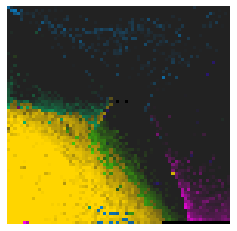

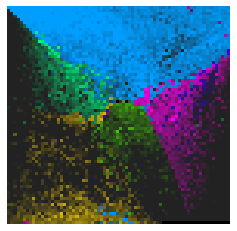

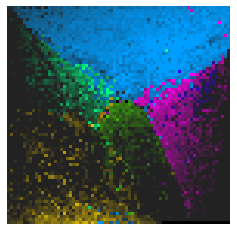

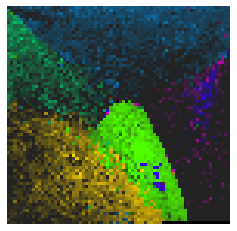

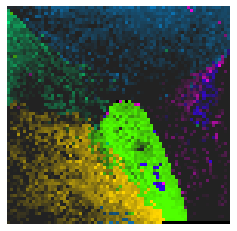

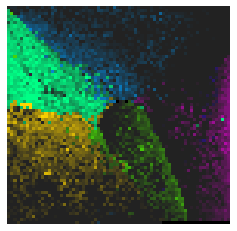

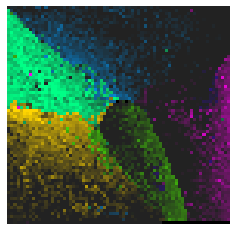

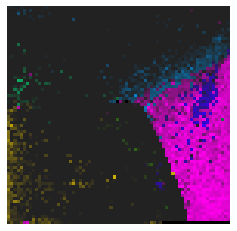

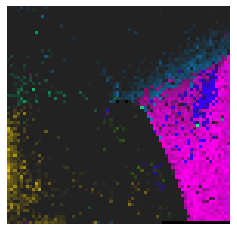

In [8]:
for i in range(9):
    show.imshow_wrap(X[i], color_list=mp.colormaps.values(), x_max=1, vmin=-0.5, vmax=2)

## Single-channel Fmaps

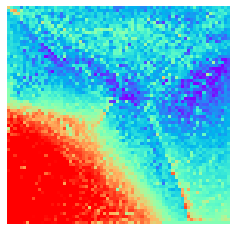

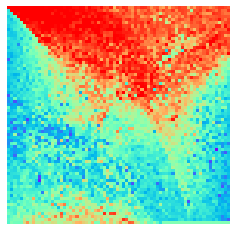

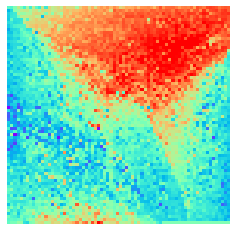

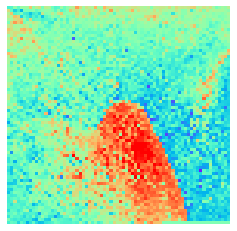

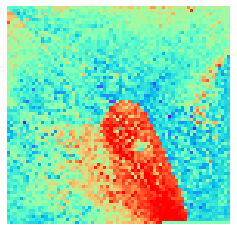

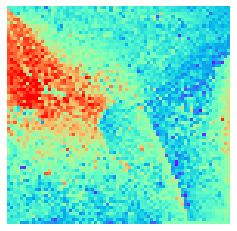

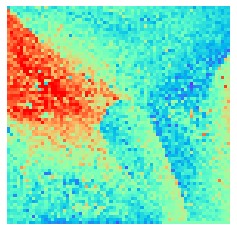

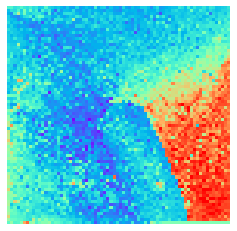

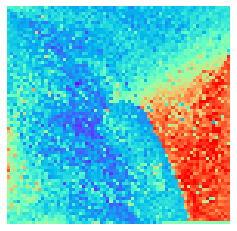

In [9]:
for i in range(9):
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(X[i].sum(axis=-1).reshape(*mp.fmap_shape), ax = ax, cmap = 'rainbow', yticklabels=False, xticklabels=False, cbar=False, vmin=-2, vmax=2)

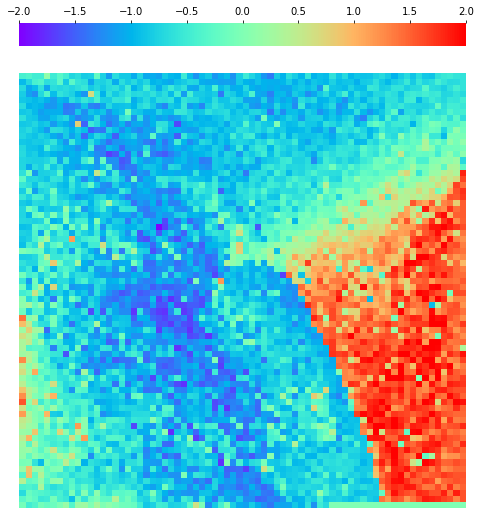

In [10]:
fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(X[i].sum(axis=-1).reshape(*mp.fmap_shape), ax = ax, cmap = 'rainbow', 
            yticklabels=False, xticklabels=False, cbar=True, vmin=-2, vmax=2,  
            cbar_kws = dict(use_gridspec=False,location="top"))
fig.savefig('legend.pdf')

## Visulization

### 01.scatter plot

In [11]:
mp.plot_scatter()

2022-08-01 16:26:59,451 - INFO - [bidd-aggmap] - generate file: ./feature points_5162_correlation_umap_scatter
2022-08-01 16:26:59,480 - INFO - [bidd-aggmap] - save html file to ./feature points_5162_correlation_umap_scatter


### 02.grid plot

In [12]:
mp.plot_grid()

2022-08-01 16:26:59,508 - INFO - [bidd-aggmap] - generate file: ./feature points_5162_correlation_umap_mp
2022-08-01 16:26:59,530 - INFO - [bidd-aggmap] - save html file to ./feature points_5162_correlation_umap_mp


### 03.tree plot

In [15]:
mp.to_nwk_tree()

,TYPE,colors,STYLE
ENSG00000003436,clade,#ffd500,normal
ENSG00000004139,clade,#ffd500,normal
ENSG00000004799,clade,#ffd500,normal
ENSG00000004948,clade,#ffd500,normal
ENSG00000005073,clade,#ffd500,normal
...,...,...,...
ENSG00000280053,clade,#ff00ed,normal
ENSG00000280202,clade,#ff00ed,normal
ENSG00000280206,clade,#ff00ed,normal
ENSG00000283154,clade,#ff00ed,normal


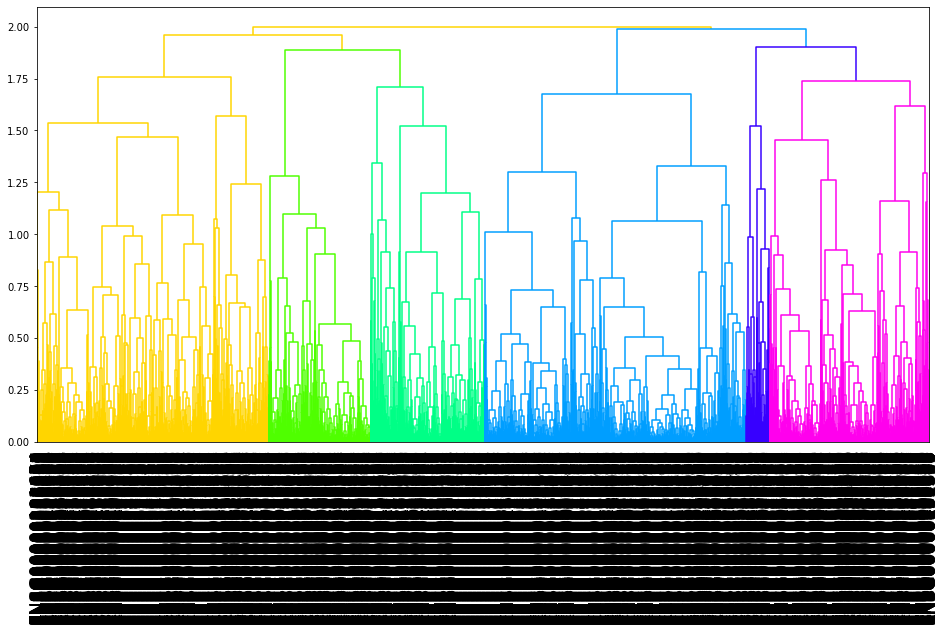

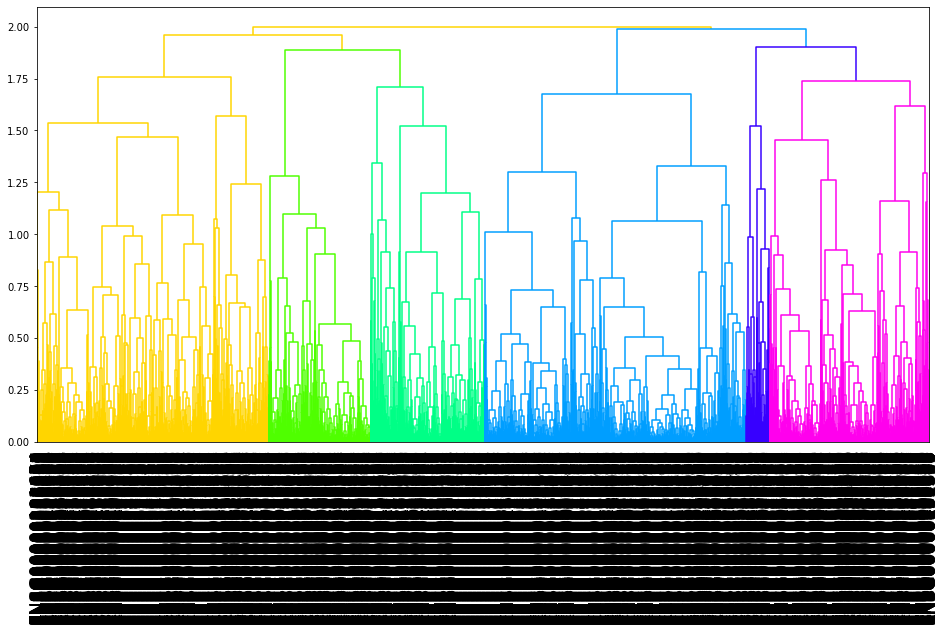

In [14]:
mp.plot_tree()